**`Exploratory Data Analysis`** and **`Location or Rooms: What Influences House Prices in Melbourne?`**

In [70]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/zoxidjoon/datasets/main/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**`The dataset is so big and there're some columns we don't need in this project, so I'm gonna drop them off`**

In [72]:
df.drop(columns=['Suburb', 'Type', 'Method',
                 'SellerG', 'Date', 'Distance',
                 'Postcode', 'Bedroom2', 'Bathroom',
                 'Car', 'BuildingArea',
                 'YearBuilt', 'CouncilArea'], inplace=True)

# renaming some columns
df.rename(columns = {"Landsize":"Area_m2", "Regionname":"Region"}, inplace=True)

In [73]:
# Using plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="Lattitude",
    lon="Longtitude",
    center={"lat": -37.80, "lon": 145.04},
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["Price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [74]:
# Getting value counts of "Region" column
df.Region.value_counts().head()

Region
Southern Metropolitan         4668
Northern Metropolitan         3869
Western Metropolitan          2938
Eastern Metropolitan          1468
South-Eastern Metropolitan     450
Name: count, dtype: int64

In [75]:
# Describing "Area_m2", "Price" columns
df[["Area_m2", "Price"]].describe()

,Area_m2,Price
count,13518.000000,1.351800e+04
mean,558.110593,1.074796e+06
std,3998.194560,6.398586e+05
min,0.000000,8.500000e+04
25%,178.000000,6.500000e+05
50%,442.500000,9.010000e+05
75%,651.000000,1.328000e+06
max,433014.000000,9.000000e+06


Text(0.5, 1.0, 'Distribution of Home Sizes')

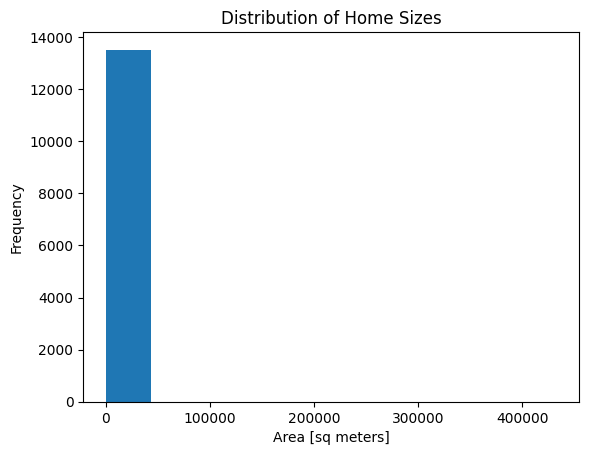

In [76]:
plt.hist(df["Area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

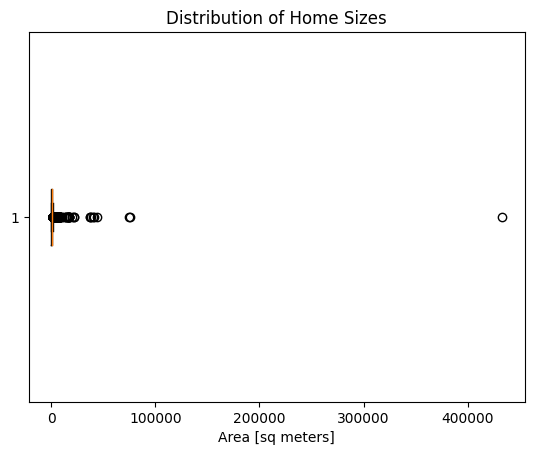

In [77]:
plt.boxplot(df["Area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Prices')

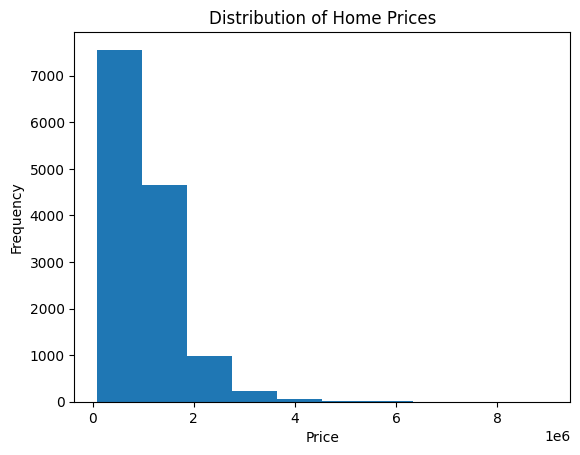

In [78]:
plt.hist(df["Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

Text(0.5, 1.0, 'Distribution of Home Prices')

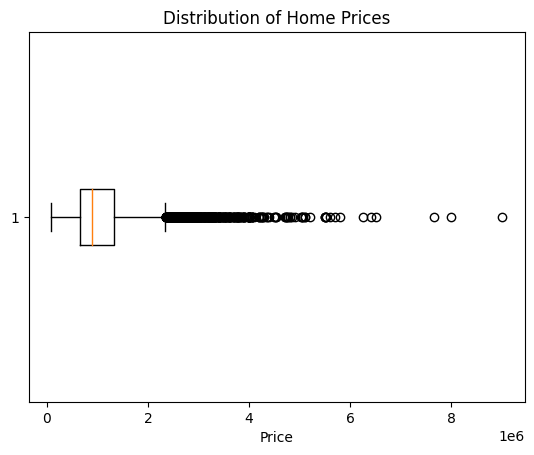

In [79]:
plt.boxplot(df["Price"], vert=False)
plt.xlabel("Price")
plt.title("Distribution of Home Prices")

In [80]:
region_mean_price = df.groupby("Region")["Price"].mean().sort_values(ascending=False)
region_mean_price

Region
Southern Metropolitan         1.372327e+06
Eastern Metropolitan          1.104081e+06
South-Eastern Metropolitan    9.229438e+05
Northern Metropolitan         8.963281e+05
Western Metropolitan          8.663910e+05
Eastern Victoria              6.999808e+05
Northern Victoria             5.947000e+05
Western Victoria              3.975234e+05
Name: Price, dtype: float64

<Axes: title={'center': 'Mean House Price by Region'}, xlabel='Region', ylabel='Mean Price'>

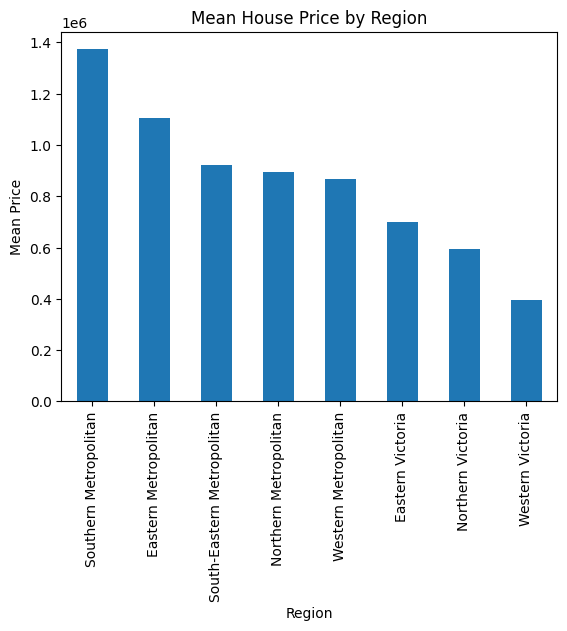

In [81]:
region_mean_price.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Mean Price",
    title="Mean House Price by Region"
)

Text(0.5, 1.0, 'Price vs Area')

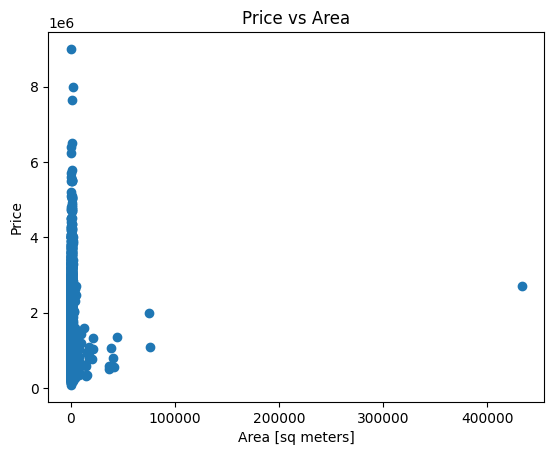

In [82]:
plt.scatter(x=df["Area_m2"], y=df["Price"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price")
plt.title("Price vs Area")

In [83]:
# Calculate correlation of "Price" and "Area_m2"
p_correlation = df.Area_m2.corr(df.Price)
print("Correlation of 'Area_m2' and 'Price':", p_correlation)

Correlation of 'Area_m2' and 'Price': 0.03748177366256409
